# Wstęp

Celem zadania było przeprowadzenie analizy danego zbioru danych i przeprowadzenie testu statystycznego mającego sprawdzić prawdziwość hipotez.
# Część praktyczna zadania
## Rozdzielenie populacji C1 i C2 na podstawie wartości parametru C

In [62]:
population_data = open("211968.txt").read().strip().split("\n")

In [63]:
c1 = []
c2 = []

for line in population_data:
    valX, valC = line.split()
    valX = float(valX)
    valC = int(float(valC))
    
    T = c2 if valC != 1 else c1
    T.append(valX)

Przyporządkowanie danych do odpowiadającyh im populacji C1 i C2. Przynależność do danej grupy jest określana na podstawie parametru C {0, 1}.

In [76]:
# konfiguracja matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import math
import matplotlib.pylab as plt



## Odczytanie danych definiujących dodatkowe założenia

In [77]:
additional_data = open("211968.info").read().strip().split("\n")
additional_data

['Alfa = 0.01', 'Rozkład jednostronny']

## Histogram prezentujący zróżnicowanie cechy X pośród populacji C1 i C2

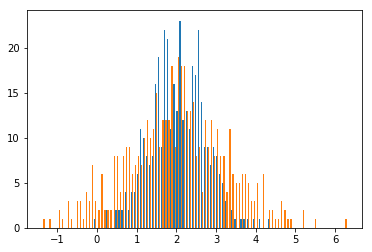

In [78]:
_ = plt.hist((c1, c2), 100)

## Znalezienie parametrów statystycznych określonych w zadaniu
### Funkcje pomocnicze

#### Średnia arytmetyczna
Średnia arytmetyczna jest ilorazem sumy danych liczb i ich ilości. Na potrzeby zadania funkcja wyliczająca tę średnią przyjmuje jeden obiekt "array" - w naszym zadaniu będzie to lista atrybutów X z populacji C1 lub C2.

In [79]:
def mean(array):
    res = sum(array) / len(array)
    return round(res, 3)

#### Odchylenie standardowe
Odchylenie standardowe określa o ile wszystkie jednostki danej zbiorowości różnią się średnio od średniej arytmetycznej badanej zmiennej. Funkcja ta podobnie przyjmuje jeden argument.

In [80]:
def standard_deviation(array):
    m = mean(array)
    return round(math.sqrt(sum((i - m) ** 2 for i in array) / (len(array) - 1)), 3)

#### Liczba stopni swobody

In [81]:
def computeDF(arr1, arr2):
    s1 = standard_deviation(arr1)
    s2 = standard_deviation(arr2)
    
    s1_squared = (s1 ** 2)
    s2_squared = (s2 ** 2)
    n1 = len(arr1)
    n2 = len(arr2)

    DF = (s1_squared / n1 + s2_squared / n2) ** 2 \
       / (( (s1_squared / n1) ** 2 / (n1 - 1)) \
       + (  (s2_squared / n2) ** 2 / (n2 - 1)))

    return round(DF, 3)

### Obliczenia:

#### Średnia i odchylenie standardowe

In [82]:
mean_c1, mean_c2 = mean(c1), mean(c2)
stdev_c1, stdev_c2 = standard_deviation(c1), standard_deviation(c2)

#### Znormalizowana róznica średnich oraz ilość stopni swobody

In [83]:
z = (mean_c1 - mean_c2) / math.sqrt(stdev_c1 ** 2 / len(c1) + stdev_c2 ** 2 / len(c2))
z = -abs(z)
df = computeDF(c1, c2)

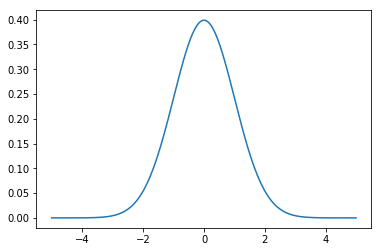

In [84]:
def normal(X):
    return (math.e**( (-X*X) / 2) ) / math.sqrt(math.pi*2)

normal_x = [-5 + i * 0.01 for i in range(1000)]
normal_y = [normal(x) for x in normal_x]

plt.figure()
_ = plt.plot(normal_x, normal_y)

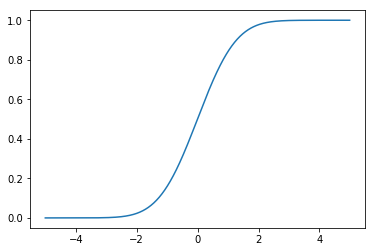

In [85]:
dist_y = [0]
for y in normal_y:
    dist_y.append(dist_y[-1] + y * 0.01)

dist_y = dist_y[1:]

plt.figure()
_ = plt.plot(normal_x, dist_y)

In [86]:
def find_dist(X):
    for i in range(len(normal_x)):
        if normal_x[i] > X:
            return dist_y[i]
    return 1

find_dist(z)

0.2373033219168843

# Prezentacja wyników przetwarzania danych i wnioski

In [87]:
print("1st sample size = " + str(len(c1)))
print("2nd sample size = " + str(len(c2)))

print("1st sample mean = " + str(mean_c1))
print("2nd sample mean = " + str(mean_c2))
print("1st sample stdev = " + str(stdev_c1))
print("2nd sample stdev = " + str(stdev_c2))
print("Degrees of freedom for Student-t distribution = " + str(df))

print("\nResults:")

print("Statistics value z = " + str(z))
print("Normal distribution: p-value = " + str((find_dist((z)))))

1st sample size = 395
2nd sample size = 517
1st sample mean = 2.044
2nd sample mean = 1.997
1st sample stdev = 0.686
2nd sample stdev = 1.236
Degrees of freedom for Student-t distribution = 837.639

Results:
Statistics value z = -0.7299063445878415
Normal distribution: p-value = 0.2373033219168843


Wartość funkcji dystrybuanty dla z wynoszącego w przybliżeniu -0.73 wynosi około 0.23. Jest to wartość znacząco większa niż określony na początku zadania poziom alfa.

Hipoteza zerowa zakłada, że wartości średnich arytmetycznych w obu zbiorach danych są takie same i parametr X nie może służyć klasyfikacji zbiorów. Istotnie, w moim zbiorze danych wartości średnich nie odbiegają od siebie znacznie:

In [88]:
diff_means = abs(mean_c1 - mean_c2)
diff_means

0.04699999999999993

Na podstawie zebranych danych podejmuję decyzję o nieodrzuceniu hipotezy zerowej.